$\begin{align}
	&u_t + c(x)u_x = 0, \text{ em } [0,5] \times [0,6.4], \\
	&u(x,0) = f(x), \\~\\
	&c(x) = 1/5+\sin(x-1)^2, \\
	&f(x) = e^{-100(x-1)^2}
\end{align}$

In [1]:
using Plots, JLD, Random
Random.seed!(123)

TaskLocalRNG()

In [2]:
function Upwind(u0,x,t,λ)
	u = zeros(length(t),length(x))
	u[1,:] = u0
	for n = 1:length(t)-1
		u[n+1,1] = 0 
		for j = 2:length(x)
			u[n+1,j] = u[n,j] - λ[j]*(u[n,j] - u[n,j-1])
		end 
	end
	return u
end

Upwind (generic function with 1 method)

In [3]:
xmin = 0; xmax = 5; Δx = 0.5
tmin = 0; tmax = 6.4; Δt = Δx/1.2
x = xmin:Δx:xmax; t = tmin:Δt:tmax
c(x) = 1/5+sin(x-1)^2
λ = c.(x)*Δt/Δx
f(x) = exp(-100*(x-1)^2)
u0 = f.(x)
u = Upwind(u0,x,t,λ);

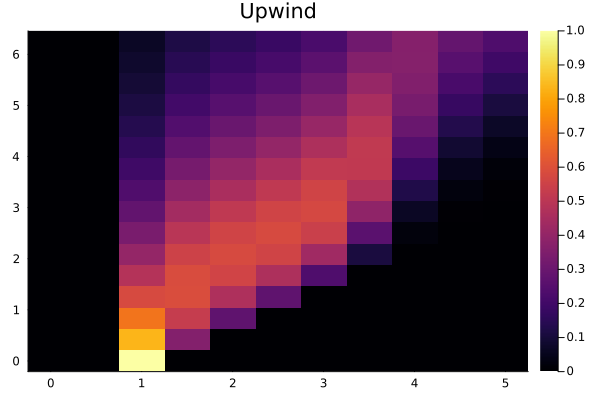

In [4]:
heatmap(x, t, u, title="Upwind")

In [5]:
u_x = zeros(length(t),length(x))
u_t = zeros(length(t),length(x))
LX = length(x)

for n = 1:length(t)
    u_x[n,1] = (-3*u[n,1]-4*u[n,2]-u[n,3])/(2*Δx)
    u_x[n,LX] = (u[n,LX-2]-4*u[n,LX-1]+3*u[n,LX])/(2*Δx)
    for j = 2:length(x)-1
        u_x[n,j] = (-u[n,j-1]+u[n,j+1])/(2*Δx)
    end
end

In [6]:
# derivadas 

du = zeros(length(t),length(x))
for n = 2:length(t)-1
    for j = 2:length(x)-1
        du[n,j] = u[n,j] - λ[j]*(u[n,j] - u[n,j-1])
    end 
end

In [7]:
xt_C = zeros(length(u),2) # C de completo
u_C = zeros(length(u),1)
k = 1
for i = 1:length(t)
    for j = 1:length(x)
        xt_C[k,:] = [x[j],t[i]]
        u_C[k,1] = u[i,j]
        k = k + 1
    end
end

In [8]:
K = zeros(length(u),3)
K[:,1:2] = xt_C
K[:,3] = u_C
K

176×3 Matrix{Float64}:
 0.0  0.0   3.72008e-44
 0.5  0.0   1.38879e-11
 1.0  0.0   1.0
 1.5  0.0   1.38879e-11
 2.0  0.0   3.72008e-44
 2.5  0.0   1.92195e-98
 3.0  0.0   1.91517e-174
 3.5  0.0   3.68086e-272
 4.0  0.0   0.0
 4.5  0.0   0.0
 ⋮          
 1.0  6.25  0.0649055
 1.5  6.25  0.118968
 2.0  6.25  0.151083
 2.5  6.25  0.179797
 3.0  6.25  0.219865
 3.5  6.25  0.312931
 4.0  6.25  0.363128
 4.5  6.25  0.283393
 5.0  6.25  0.23214

In [9]:
n_dados = length(u)
indices_sorteados = shuffle(1:length(u_C))[1:n_dados]
u_D = u_C[indices_sorteados]
xt_D = xt_C[indices_sorteados,1:2]


176×2 Matrix{Float64}:
 1.0  1.25
 0.5  2.5
 0.5  6.25
 1.0  0.0
 2.5  4.16667
 4.5  5.0
 3.5  0.0
 0.5  0.833333
 3.5  4.58333
 3.5  2.08333
 ⋮    
 4.0  3.33333
 5.0  2.5
 1.5  3.75
 5.0  6.25
 1.0  3.75
 2.0  0.0
 4.5  1.25
 4.5  5.41667
 2.5  1.66667

In [10]:
D = [xt_D, u_D]

2-element Vector{Array{Float64}}:
 [1.0 1.25; 0.5 2.5; … ; 4.5 5.416666666666667; 2.5 1.6666666666666667]
 [0.5787037037075023, 9.705240359075676e-13, 1.7929113241291272e-14, 1.0, 0.39945780557583144, 0.17420667402949275, 3.6808558548018004e-272, 5.720413200119129e-12, 0.4916126440285835, 0.1074379631101102  …  0.0, 0.12303980422580747, 4.6843940813560194e-46, 0.32789684926893964, 0.2321404750458966, 0.19380669946993362, 3.720075976020836e-44, 4.39492978354411e-176, 0.2166938892825056, 0.4649817246968108]

In [11]:
save("Upwind_Dados.jld", "D", D)